In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("LoanData.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df=df.drop("Loan_ID",axis="columns")

In [7]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.describe(include="object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
for col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']:
       print("\n",df[col],df[col].value_counts())


 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object Male      489
Female    112
Name: Gender, dtype: int64

 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object Yes    398
No     213
Name: Married, dtype: int64

 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object Graduate        480
Not Graduate    134

In [12]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [14]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [15]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [16]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [17]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [19]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

<Axes: >

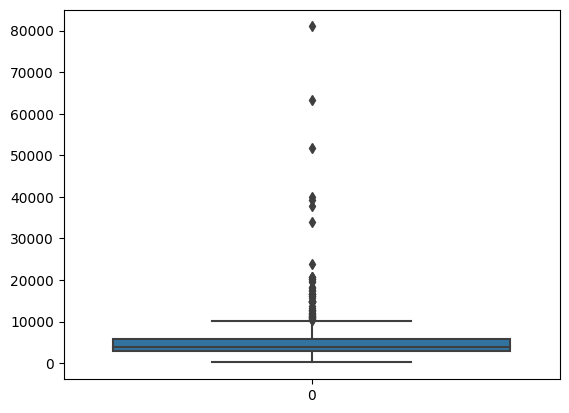

In [20]:
sns.boxplot(df["ApplicantIncome"])

In [21]:
df = df[df['ApplicantIncome'] < 25000]

<Axes: >

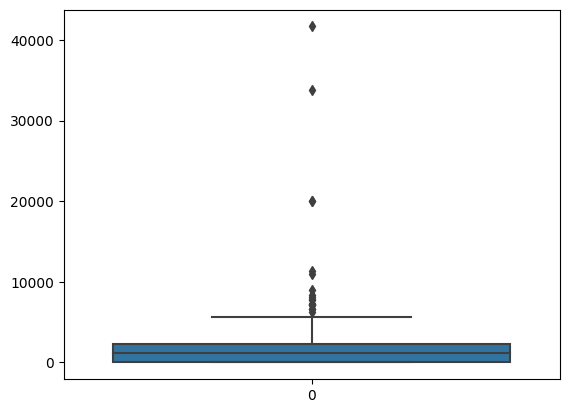

In [22]:
sns.boxplot(df["CoapplicantIncome"])

In [23]:
df = df[df['CoapplicantIncome'] < 10000]

<Axes: >

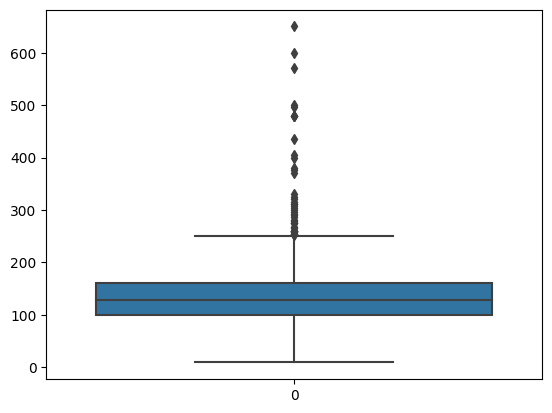

In [24]:
sns.boxplot(df["LoanAmount"])

In [25]:
df = df[df['LoanAmount'] < 300]

<Axes: >

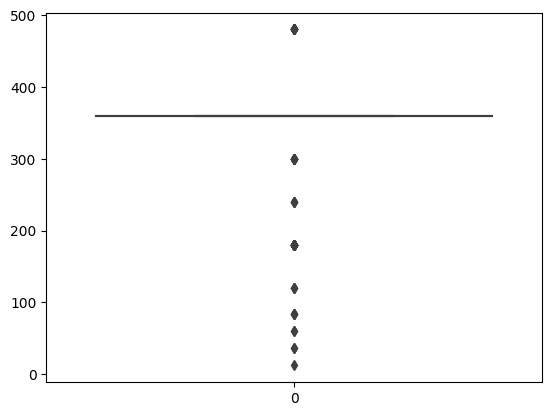

In [26]:
sns.boxplot(df["Loan_Amount_Term"])

<Axes: >

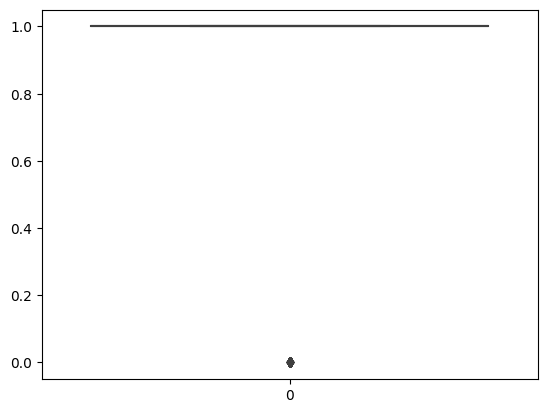

In [27]:
sns.boxplot(df["Credit_History"])

In [28]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [29]:
df["Married"]=label_encoder.fit_transform(df["Married"])

In [30]:
df["Education"]=label_encoder.fit_transform(df["Education"])

In [31]:
df["Self_Employed"]=label_encoder.fit_transform(df["Self_Employed"])

In [32]:
df["Loan_Status"]=label_encoder.fit_transform(df["Loan_Status"])

In [33]:
df["Property_Area"]=label_encoder.fit_transform(df["Property_Area"])

In [34]:
df["Dependents"]=label_encoder.fit_transform(df["Dependents"])

In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [40]:
y=df["Loan_Status"]
x=df.drop(["Loan_Status"],axis=1)

In [37]:
!pip install --upgrade imbalanced-learn


In [65]:
X,Y=SMOTE().fit_resample(x,y.values.ravel())

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Logistic Regression

In [67]:
lr=LogisticRegression(max_iter=10000,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [68]:
lr.score(x_train,y_train)

0.7831513260530422

In [69]:
lr.score(x_test,y_test)

0.7577639751552795

In [72]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7577639751552795
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        81
           1       0.70      0.89      0.78        80

    accuracy                           0.76       161
   macro avg       0.78      0.76      0.75       161
weighted avg       0.78      0.76      0.75       161

Confusion Matrix:
[[51 30]
 [ 9 71]]


#Random Forest

In [71]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8074534161490683
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.79        81
           1       0.75      0.91      0.82        80

    accuracy                           0.81       161
   macro avg       0.82      0.81      0.81       161
weighted avg       0.82      0.81      0.81       161

Confusion Matrix:
[[57 24]
 [ 7 73]]


#Gradient Boosting

In [80]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7950310559006211
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        81
           1       0.74      0.91      0.82        80

    accuracy                           0.80       161
   macro avg       0.81      0.80      0.79       161
weighted avg       0.81      0.80      0.79       161

Confusion Matrix:
[[55 26]
 [ 7 73]]
